# Aim

### To understand which variables helps in predicting price of a house and how well these parameters describe the price of a house

# Problem statement

### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company wants to know:
            1. Which variables are significant in predicting the price of a house.
            2. How well those variables describe the price of a house.

## 1. Data sourcing

In [76]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [27]:
house_df = pd.read_csv("train.csv")

In [28]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Understanding

In [30]:
for col in house_df.columns:
    print("column name : " + col)
    print(house_df[col].astype('category').value_counts())

column name : Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
column name : MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
column name : MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
column name : LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
39.0       1
111.0      1
112.0      1
128.0      1
Name: LotFrontage, Length: 110, dtype: int64
column name : LotArea
7200      25
9600      24
6000      17
9000      14
10800     14
          ..
8930       1
8935       1
8944       1
8960       1
215245     1
Name: LotArea, Length: 1073, dtype: int64
column name : Street
Pave    1454
Grvl       6
Name: Street, d

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64
column name : PoolQC
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
column name : Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
column name : MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
column name : MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
1300        1
8300        1
3500        1
2500        1
1400        1
1150        1
800         1
54          1
620         1
560         1
350         1
15500       1
Name: MiscVal, dtype: int64
column name : MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
column name : YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSo

# 3. Data cleaning
      

### a. Dropping unique identifier and insignificant columns

In [31]:
#Based on data definition we can drop following columns
#Unique identification column - Id
#Based on data definition and data understanding, following columns seems irrelevant for our final goal
#"MoSold, MiscVal,Street, PoolArea, PoolQC"

In [32]:
house_df = house_df.drop(['Street','MoSold','MiscVal','Id','PoolArea', 'PoolQC'], axis=1)

In [33]:
house_df.shape

(1460, 75)

###   a. Null Values

### We can see that there are lot of null values so we proceed to handle them

In [34]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,2010.000000,755000.000000


In [35]:
# columns that have missing values
house_df.columns[house_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature'],
      dtype='object')

In [36]:
# finding the count of missing values in the columns
columns_nan =  house_df.columns[house_df.isnull().any()]

for c in columns_nan:
    print(c, house_df[c].isnull().sum())


LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
Fence 1179
MiscFeature 1406


In [37]:
#Finding percentage of missing values of all columns which has missing values
print(round(100*(house_df.loc[:, house_df.isnull().any()].isnull().sum())/len(house_df.index), 2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
Fence           80.75
MiscFeature     96.30
dtype: float64


In [38]:
#imputing missing values based on data definition
house_df.loc[house_df['Alley'].isnull(),['Alley']] = 'No alley access'
house_df.loc[house_df['LotFrontage'].isnull(),['LotFrontage']] = house_df['LotFrontage'].mean()
house_df.loc[house_df['MasVnrArea'].isnull(),['MasVnrArea']] = 0
house_df.loc[house_df['MasVnrType'].isnull(),['MasVnrType']] = 'none'
house_df.loc[house_df['GarageType'].isnull(),['GarageType']] = 'No Garage'
house_df.loc[house_df['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
house_df.loc[house_df['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
house_df.loc[house_df['GarageCond'].isnull(),['GarageCond']] = 'No Garage'
house_df.loc[house_df['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
house_df.loc[house_df['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
house_df.loc[house_df['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
house_df.loc[house_df['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
house_df.loc[house_df['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'
house_df.loc[house_df['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'
house_df.loc[house_df['Fence'].isnull(),['Fence']] = 'No Fence'
house_df.loc[house_df['MiscFeature'].isnull(),['MiscFeature']] = 'none'
house_df.loc[house_df['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2019
house_df.loc[house_df['Electrical'].isnull(),['Electrical']] = "SBrkr"

In [39]:
#checking for null values after imputation
print(round(100*(house_df.loc[:, house_df.isnull().any()].isnull().sum())/len(house_df.index), 2))

Series([], dtype: float64)


In [40]:
#dropping all columns with 45% and more missing values
for col in columns_nan:
    if house_df[col].isnull().sum()*100/house_df.shape[0]>45:
        house_df.drop(col,1, inplace=True)

In [41]:
#checking for null values after dropping high percentaged missing values
print(round(100*(house_df.loc[:, house_df.isnull().any()].isnull().sum())/len(house_df.index), 2))

Series([], dtype: float64)


In [42]:
house_df.shape

(1460, 75)

### check for duplicates

In [43]:
house_df.duplicated().value_counts()

False    1460
dtype: int64

In [44]:
#Based on above evaluation, we can see that there are no duplicates

In [45]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [46]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,1980.752740,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,25.724002,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,2010.000000,755000.000000


In [47]:
#based on data definition, we know that the MSSubClass is a categorical variable, so lets change its type
house_df[['MSSubClass']] = house_df[['MSSubClass']].astype('object')

In [48]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Making pairplot and heatmap

In [49]:
#fetching only the numerical columns(both int and float)
house_df_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_df_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,2003.0,2,548,0,61,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,1976.0,2,460,298,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,2001.0,2,608,0,42,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,1998.0,3,642,0,35,272,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,2000.0,3,836,192,84,0,0,0,2008,250000


In [ ]:
#Making pairplot for all numerical columns
sns.pairplot(house_df_numeric)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000002C0058D34C0> (for post_execute):


KeyboardInterrupt: 

In [51]:
#creating correlation matrix
cor_matrix = house_df_numeric.corr()
cor_matrix

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SalePrice
LotFrontage,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,...,0.025036,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.006768,0.334901
LotArea,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,-0.049824,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,-0.014261,0.263843
OverallQual,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.388760,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,-0.027347,0.790982
OverallCond,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.289078,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,0.043950,-0.077856
YearBuilt,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.644784,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,-0.013618,0.522897
YearRemodAdd,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.535542,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.035743,0.507101
MasVnrArea,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.186427,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,-0.008317,0.472614
BsmtFinSF1,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.101284,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.014359,0.386420
BsmtFinSF2,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,-0.095592,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.031706,-0.011378
BsmtUnfSF,0.122156,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,0.161719,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.041258,0.214479


In [52]:
#heatmap using correlations
plt.figure(figsize = (40, 40))
sns.heatmap(cor_matrix, annot=True)
plt.show()

KeyboardInterrupt: 

    e. Outlier treatment

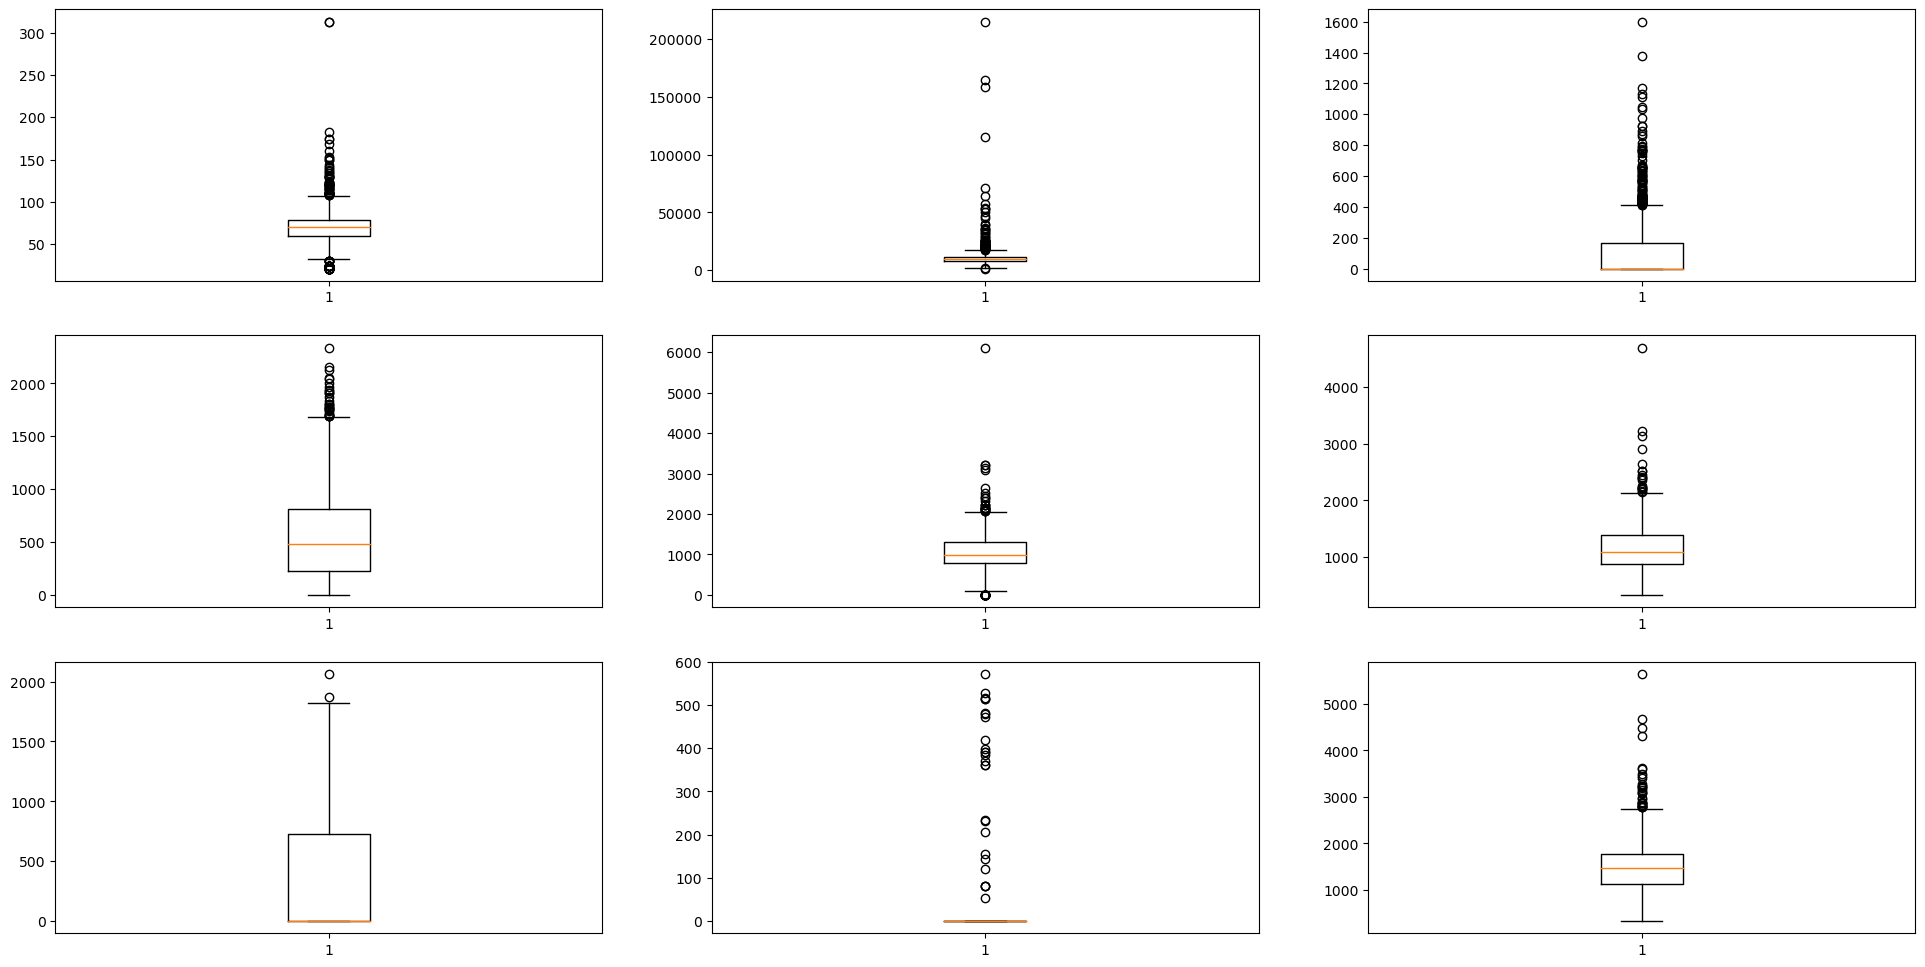

In [53]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house_df.LotFrontage)
plt.subplot(3,3,2)
plt.boxplot(house_df.LotArea)
plt.subplot(3,3,3)
plt.boxplot(house_df.MasVnrArea)
plt.subplot(3,3,4)
plt.boxplot(house_df.BsmtUnfSF)
plt.subplot(3,3,5)
plt.boxplot(house_df.TotalBsmtSF)
plt.subplot(3,3,6)
plt.boxplot(house_df['1stFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(house_df['2ndFlrSF'])
plt.subplot(3,3,8)
plt.boxplot(house_df.LowQualFinSF)
plt.subplot(3,3,9)
plt.boxplot(house_df.GrLivArea)
plt.show()

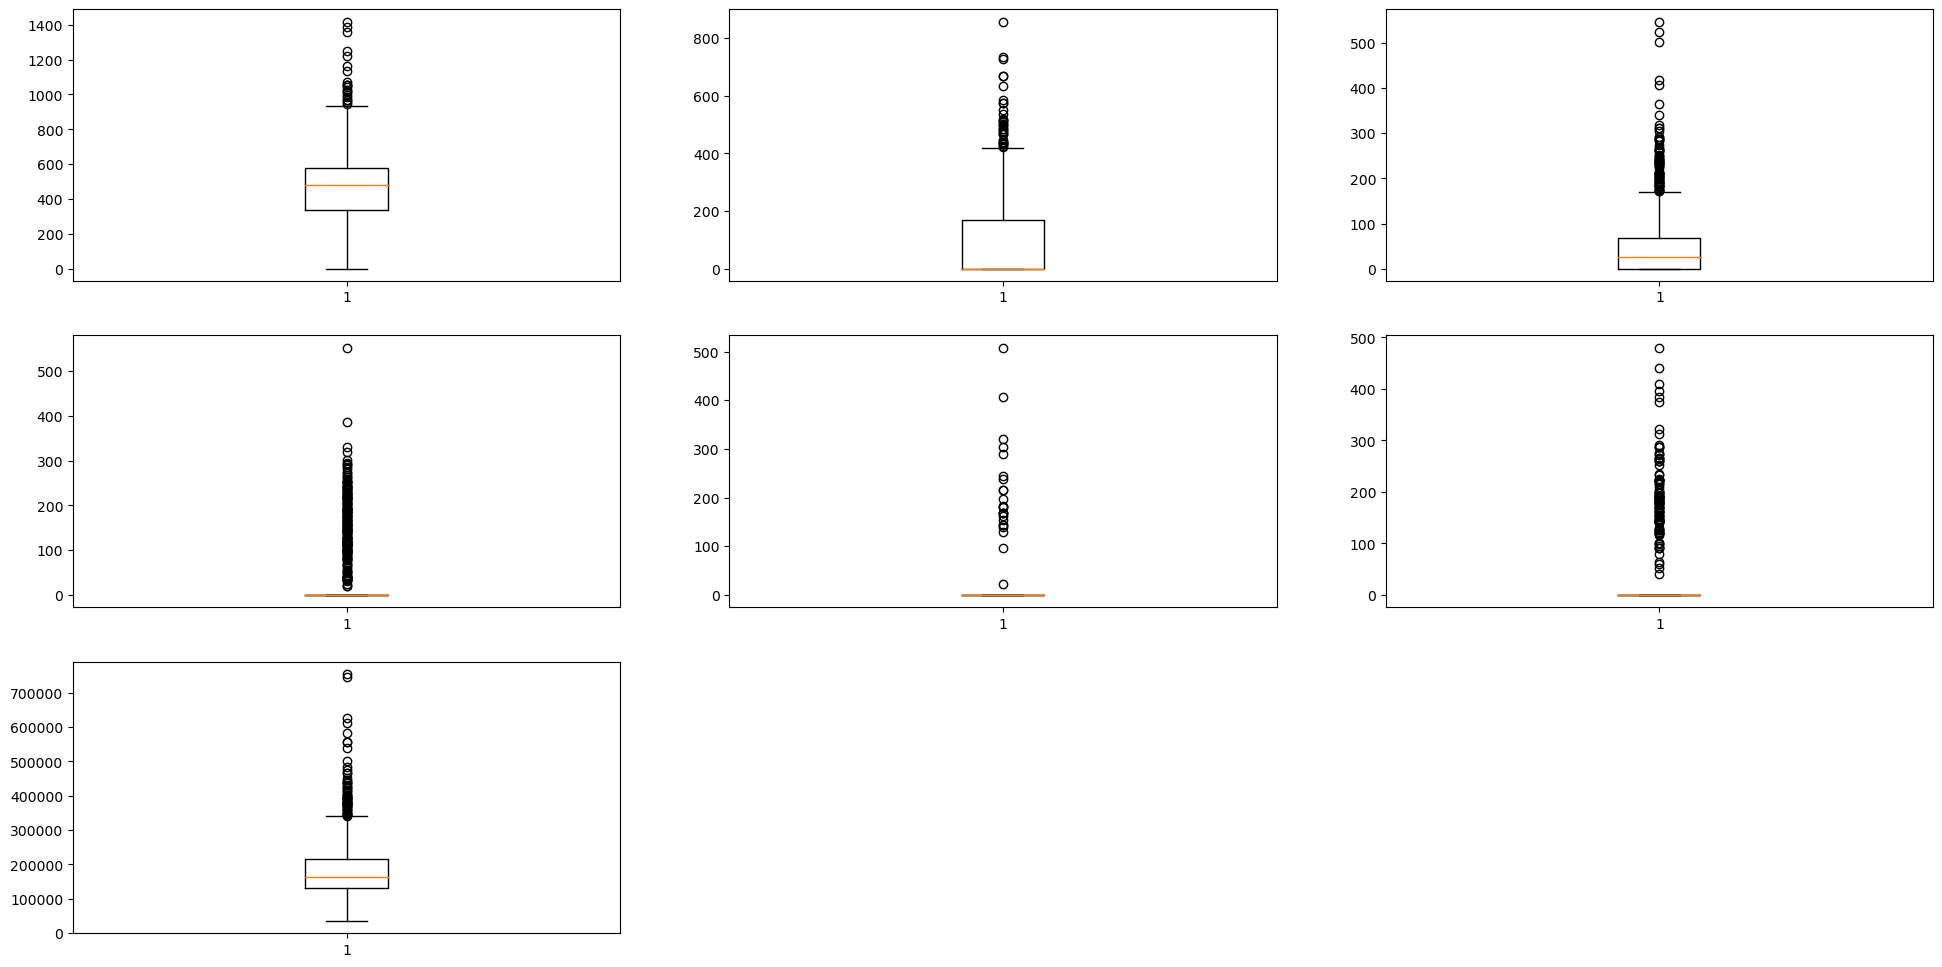

In [55]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house_df.GarageArea)
plt.subplot(3,3,2)
plt.boxplot(house_df.WoodDeckSF)
plt.subplot(3,3,3)
plt.boxplot(house_df.OpenPorchSF)
plt.subplot(3,3,4)
plt.boxplot(house_df.EnclosedPorch)
plt.subplot(3,3,5)
plt.boxplot(house_df['3SsnPorch'])
plt.subplot(3,3,6)
plt.boxplot(house_df.ScreenPorch)
plt.subplot(3,3,7)
plt.boxplot(house_df.SalePrice)
plt.show()

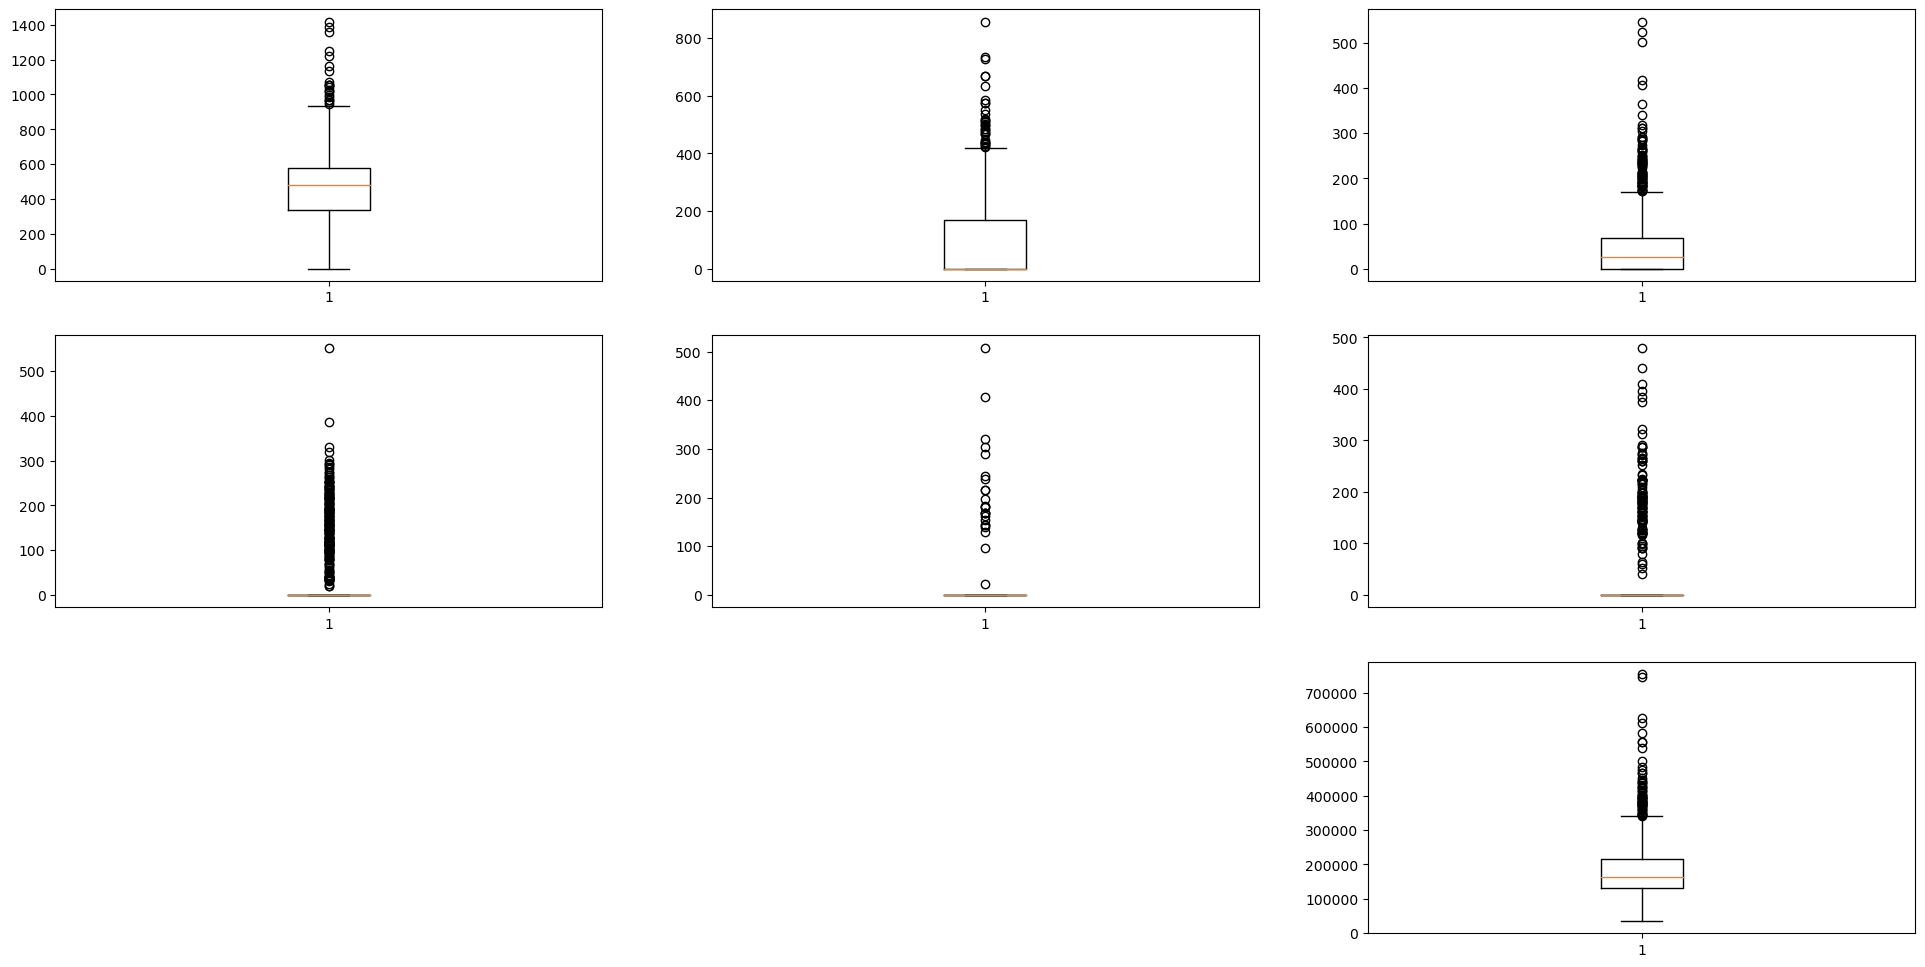

In [56]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house_df.GarageArea)
plt.subplot(3,3,2)
plt.boxplot(house_df.WoodDeckSF)
plt.subplot(3,3,3)
plt.boxplot(house_df.OpenPorchSF)
plt.subplot(3,3,4)
plt.boxplot(house_df.EnclosedPorch)
plt.subplot(3,3,5)
plt.boxplot(house_df['3SsnPorch'])
plt.subplot(3,3,6)
plt.boxplot(house_df.ScreenPorch)
plt.subplot(3,3,9)
plt.boxplot(house_df.SalePrice)
plt.show()

In [57]:
# outlier treatment for LotFrontage
Q1 = house_df.LotFrontage.quantile(0.25)
Q3 = house_df.LotFrontage.quantile(0.75)
IQR = Q3 - Q1
house_df = house_df[(house_df.LotFrontage >= Q1 - 1.5*IQR) & (house_df.LotFrontage <= Q3 + 1.5*IQR)]

In [58]:
# outlier treatment for LotArea
Q1 = house_df.LotArea.quantile(0.25)
Q3 = house_df.LotArea.quantile(0.75)
IQR = Q3 - Q1
house_df = house_df[(house_df.LotArea >= Q1 - 1.5*IQR) & (house_df.LotArea <= Q3 + 1.5*IQR)]

In [59]:
house_df.shape

(1288, 75)

## 3. derived columns

In [60]:
# Using yearBuilt column, age can be found out

house_df["house_age"] = 2024 - house_df["YearBuilt"]
# Using  GarageYrBlt, age can be found out
house_df["garage_age"] = 2024 - house_df["GarageYrBlt"]
house_df["gap_between_build_remodel"] = house_df["YearRemodAdd"] - house_df["YearBuilt"]

In [61]:
# Drop original year and month columns after deriving columns
house_df = house_df.drop(['GarageYrBlt','YearBuilt','YrSold','YearRemodAdd'], axis=1)

## Data preparation for modelling

In [62]:
# split into X and y
X = house_df.drop(['SalePrice'], axis=1)
y = house_df['SalePrice']

In [63]:
X.shape

(1288, 73)

In [64]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,SaleType,SaleCondition,house_age,garage_age,gap_between_build_remodel
0,60,RL,65.0,8450,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,No Fence,none,WD,Normal,21,21.0,0
1,20,RL,80.0,9600,No alley access,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,No Fence,none,WD,Normal,48,48.0,0
2,60,RL,68.0,11250,No alley access,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,No Fence,none,WD,Normal,23,23.0,1
3,70,RL,60.0,9550,No alley access,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,No Fence,none,WD,Abnorml,109,26.0,55
4,60,RL,84.0,14260,No alley access,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,No Fence,none,WD,Normal,24,24.0,0


In [65]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [66]:
# creating dummy variables for yes/no categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['CentralAir']

# defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# applying the function to column with yes /no data
X[binary_vars_list] = X[binary_vars_list].apply(binary_map)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,SaleType,SaleCondition,house_age,garage_age,gap_between_build_remodel
0,60,RL,65.0,8450,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,No Fence,none,WD,Normal,21,21.0,0
1,20,RL,80.0,9600,No alley access,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,No Fence,none,WD,Normal,48,48.0,0
2,60,RL,68.0,11250,No alley access,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,No Fence,none,WD,Normal,23,23.0,1
3,70,RL,60.0,9550,No alley access,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,No Fence,none,WD,Abnorml,109,26.0,55
4,60,RL,84.0,14260,No alley access,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,No Fence,none,WD,Normal,24,24.0,0


In [67]:
# seperate all categorical variables to create dummy variables
house_df_categorical = X.select_dtypes(include=['object'])
house_df_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,No Fireplace,Attchd,RFn,TA,TA,Y,No Fence,none,WD,Normal
1,20,RL,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,No Fence,none,WD,Normal
2,60,RL,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,No Fence,none,WD,Normal
3,70,RL,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,No Fence,none,WD,Abnorml
4,60,RL,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,No Fence,none,WD,Normal


In [69]:
house_df_categorical_columns = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'Fence',  'SaleType','SaleCondition']

In [70]:
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
     

In [71]:
# convert categorical variables into dummies
house_df_dummies = pd.get_dummies(house_df_categorical, drop_first=True)
house_df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [72]:
# drop original categorical variables after creating dummies
X = X.drop(list(house_df_categorical.columns), axis=1)

Scaling data

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [75]:
X.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,house_age,garage_age,gap_between_build_remodel
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,...,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,0.491111,0.488169,0.563578,0.574049,0.060540,0.197019,0.028698,0.245136,0.326268,0.930124,...,0.436724,0.335798,0.123223,0.082856,0.058586,0.006184,0.031413,0.284741,0.322642,0.114029
std,0.191872,0.192692,0.151423,0.139243,0.106543,0.192435,0.101263,0.188989,0.126418,0.255037,...,0.186142,0.149268,0.161719,0.117000,0.156521,0.056751,0.115542,0.222601,0.219247,0.200711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373333,0.367553,0.444444,0.500000,0.000000,0.000000,0.000000,0.100492,0.250702,1.000000,...,0.250000,0.230036,0.000000,0.000000,0.000000,0.000000,0.000000,0.065217,0.134454,0.000000
50%,0.507333,0.484485,0.555556,0.500000,0.000000,0.175503,0.000000,0.207192,0.309108,1.000000,...,0.500000,0.343885,0.000000,0.043876,0.000000,0.000000,0.000000,0.271739,0.285714,0.000000
75%,0.603333,0.609071,0.666667,0.625000,0.098281,0.321069,0.000000,0.345890,0.395274,1.000000,...,0.500000,0.414388,0.228261,0.124314,0.000000,0.000000,0.000000,0.427536,0.478992,0.186992
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Building Model

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 1)

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8688884426099431

In [79]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8708107452784701

In [80]:
# Finding model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 24624.086),
 ('LotFrontage', 13617.785),
 ('LotArea', 25723.702),
 ('OverallQual', 125049.276),
 ('OverallCond', 38371.512),
 ('MasVnrArea', 36742.417),
 ('BsmtFinSF1', -1.5746722184550946e+16),
 ('BsmtFinSF2', -1.0608166590541306e+16),
 ('BsmtUnfSF', -1.6811856957584008e+16),
 ('TotalBsmtSF', 2.3073122177299244e+16),
 ('CentralAir', -9143.77),
 ('1stFlrSF', -3.53124473099977e+17),
 ('2ndFlrSF', -1.9657343682242125e+17),
 ('LowQualFinSF', -6.442630331612521e+16),
 ('GrLivArea', 3.7984674663465555e+17),
 ('BsmtFullBath', 8043.636),
 ('BsmtHalfBath', -7083.016),
 ('FullBath', -4010.3),
 ('HalfBath', -2153.449),
 ('BedroomAbvGr', -94270.577),
 ('KitchenAbvGr', -66077.548),
 ('TotRmsAbvGrd', 69251.482),
 ('Fireplaces', 11066.586),
 ('GarageCars', 6057.448),
 ('GarageArea', 29496.493),
 ('WoodDeckSF', 6065.174),
 ('OpenPorchSF', 5570.022),
 ('EnclosedPorch', 7142.665),
 ('3SsnPorch', 6937.338),
 ('ScreenPorch', 12288.737),
 ('house_age', -69975.76),
 ('garage_age', -17447.189)

### We can see from above observations that our model is overfitting and accuracy is very poor on our test data set. So let's build regression model using regularization.

## 1. Lasso Regression

In [81]:
# working without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8688863198392267
0.8708022104669769


In [82]:
# lasso model  without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 24543.434),
 ('LotFrontage', 13552.042),
 ('LotArea', 25770.726),
 ('OverallQual', 125029.641),
 ('OverallCond', 38467.441),
 ('MasVnrArea', 36907.617),
 ('BsmtFinSF1', 62652.677),
 ('BsmtFinSF2', 7267.761),
 ('BsmtUnfSF', 29110.904),
 ('TotalBsmtSF', 27221.35),
 ('CentralAir', -9134.327),
 ('1stFlrSF', 130050.076),
 ('2ndFlrSF', 64119.772),
 ('LowQualFinSF', -3518.481),
 ('GrLivArea', 20775.14),
 ('BsmtFullBath', 8080.091),
 ('BsmtHalfBath', -7022.266),
 ('FullBath', -3991.577),
 ('HalfBath', -2143.9),
 ('BedroomAbvGr', -94355.056),
 ('KitchenAbvGr', -66039.169),
 ('TotRmsAbvGrd', 69216.536),
 ('Fireplaces', 11025.277),
 ('GarageCars', 6095.631),
 ('GarageArea', 29370.247),
 ('WoodDeckSF', 6088.053),
 ('OpenPorchSF', 5581.75),
 ('EnclosedPorch', 7123.579),
 ('3SsnPorch', 6932.967),
 ('ScreenPorch', 12215.599),
 ('house_age', -69882.45),
 ('garage_age', -17465.088),
 ('gap_between_build_remodel', 22958.16)]

### The model is  overfitting. So we have to tune the  hyper parameter to get a much more balanced model.

In [83]:
# k fold with r2 score , tune hyper parameter
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}


# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='r2', verbose=1)

In [84]:
gscv_results = pd.DataFrame(model_cv.cv_results_)
gscv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006238,0.001315,0.003161,0.001064,0.0001,{'alpha': 0.0001},0.848795,0.870274,0.846740,0.882909,...,0.856172,0.018081,25,0.8709,0.865811,0.872717,0.864235,0.877175,0.870168,0.004697
1,0.006846,0.001789,0.003112,0.001199,0.001,{'alpha': 0.001},0.848795,0.870275,0.846740,0.882909,...,0.856172,0.018081,24,0.8709,0.865811,0.872717,0.864235,0.877175,0.870168,0.004697
2,0.006155,0.002474,0.002598,0.001370,0.01,{'alpha': 0.01},0.848795,0.870276,0.846741,0.882909,...,0.856172,0.018081,23,0.8709,0.865811,0.872717,0.864235,0.877175,0.870168,0.004697
3,0.003770,0.001212,0.002021,0.000536,0.05,{'alpha': 0.05},0.848796,0.870283,0.846743,0.882910,...,0.856175,0.018082,22,0.8709,0.865811,0.872717,0.864235,0.877175,0.870168,0.004697
4,0.005981,0.001230,0.002830,0.000804,0.1,{'alpha': 0.1},0.848797,0.870292,0.846746,0.882911,...,0.856178,0.018083,21,0.8709,0.865811,0.872717,0.864235,0.877175,0.870168,0.004697


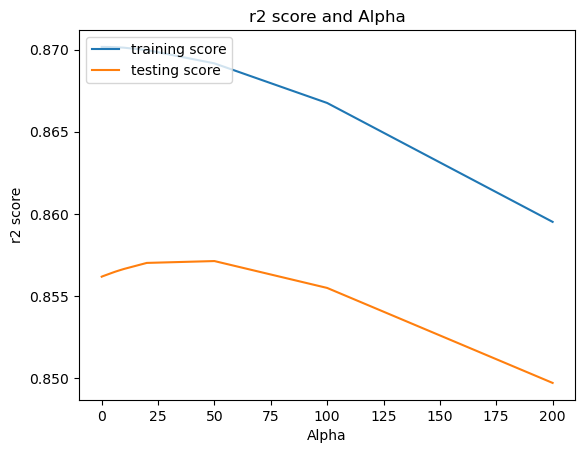

In [86]:
gscv_results['param_alpha'] = gscv_results['param_alpha'].astype('float32')
plt.plot(gscv_results['param_alpha'], gscv_results['mean_train_score'])
plt.plot(gscv_results['param_alpha'], gscv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('r2 score')
plt.title("r2 score and Alpha")
plt.legend(['training score', 'testing score'], loc='upper left')
plt.show()

### From the above two plots, we can seen that the optimal value for alpha = 50. 
### So we are going to use the value of alpha for regularization process.

In [87]:
# lasso regression
lm = Lasso(alpha=50)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8680033138726784
0.8701892602991834


In [88]:
# lasso model  with alpha = 50
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 15194.112),
 ('LotFrontage', 12961.636),
 ('LotArea', 25599.862),
 ('OverallQual', 131492.096),
 ('OverallCond', 33571.774),
 ('MasVnrArea', 33731.534),
 ('BsmtFinSF1', 43659.268),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 7754.092),
 ('TotalBsmtSF', 55005.998),
 ('CentralAir', -6630.538),
 ('1stFlrSF', 14281.667),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -16740.076),
 ('GrLivArea', 142000.604),
 ('BsmtFullBath', 6974.505),
 ('BsmtHalfBath', -3643.226),
 ('FullBath', -0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -80531.795),
 ('KitchenAbvGr', -52584.902),
 ('TotRmsAbvGrd', 53576.006),
 ('Fireplaces', 11620.941),
 ('GarageCars', 7169.24),
 ('GarageArea', 29674.084),
 ('WoodDeckSF', 4762.544),
 ('OpenPorchSF', 3877.049),
 ('EnclosedPorch', 3688.785),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 7492.236),
 ('house_age', -64347.942),
 ('garage_age', -16213.511),
 ('gap_between_build_remodel', 20819.844)]

In [89]:
# lasso model with alpha = 50
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 15194.112),
 ('LotFrontage', 12961.636),
 ('LotArea', 25599.862),
 ('OverallQual', 131492.096),
 ('OverallCond', 33571.774),
 ('MasVnrArea', 33731.534),
 ('BsmtFinSF1', 43659.268),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 7754.092),
 ('TotalBsmtSF', 55005.998),
 ('CentralAir', -6630.538),
 ('1stFlrSF', 14281.667),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -16740.076),
 ('GrLivArea', 142000.604),
 ('BsmtFullBath', 6974.505),
 ('BsmtHalfBath', -3643.226),
 ('FullBath', -0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -80531.795),
 ('KitchenAbvGr', -52584.902),
 ('TotRmsAbvGrd', 53576.006),
 ('Fireplaces', 11620.941),
 ('GarageCars', 7169.24),
 ('GarageArea', 29674.084),
 ('WoodDeckSF', 4762.544),
 ('OpenPorchSF', 3877.049),
 ('EnclosedPorch', 3688.785),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 7492.236),
 ('house_age', -64347.942),
 ('garage_age', -16213.511),
 ('gap_between_build_remodel', 20819.844)]

1. R2 score of training set : 0.9372405328256925
2. R2 score of testing set : 0.9254664123086983

### This looks good so we conclude

#### Ridge regression

In [95]:
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
ridge = Ridge()

0.868886318555774
0.8708011577607497


In [96]:
ridge.fit(X = X_train, y = y_train)
ridge.coef_

array([ 13799.65781217,  25718.82813224, 121563.88087893,  35517.52320438,
        35897.08373011,  50501.20101661,   -637.05980409,  17558.45465227,
        46966.36049308,  -7508.49376541,  67459.27589459,  31257.42176621,
       -11924.45748619,  76866.9249443 ,   9698.95702028,  -6562.33382315,
          745.14215617,    194.31982134, -74742.36643164, -53600.18485852,
        53515.61344061,  13948.85962965,  12050.54452569,  28941.54778791,
         7196.95301878,   8069.71626295,   7166.21188741,   6063.62614089,
        11310.83861061, -64612.65100749, -18689.41051247,  22389.77834205])

In [97]:
# The model is overfitting so we have to now balance

In [98]:
# K fold with r2 score and doing tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [100]:
gscv_results = pd.DataFrame(model_cv.cv_results_)
gscv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006196,0.000621,0.003995,0.000791,0.001,{'alpha': 0.001},0.867138,0.845617,0.825358,0.848947,...,0.851123,0.015869,3,0.867104,0.871772,0.876644,0.870963,0.865584,0.870413,0.003879
1,0.006318,0.001234,0.004170,0.000840,0.01,{'alpha': 0.01},0.867206,0.845600,0.825359,0.849008,...,0.851150,0.015888,2,0.867104,0.871771,0.876644,0.870962,0.865584,0.870413,0.003879
2,0.005867,0.000951,0.004111,0.000980,1.0,{'alpha': 1.0},0.871278,0.842637,0.823848,0.851984,...,0.851976,0.017780,1,0.865672,0.870638,0.875475,0.869661,0.864253,0.869140,0.003964
3,0.023294,0.033998,0.003328,0.001031,5.0,{'alpha': 5.0},0.869954,0.826937,0.813385,0.845699,...,0.844677,0.022138,4,0.854263,0.861096,0.866113,0.859510,0.852905,0.858777,0.004787
4,0.008278,0.001937,0.004325,0.001147,10.0,{'alpha': 10.0},0.860917,0.809551,0.802757,0.833746,...,0.833237,0.024213,5,0.840169,0.849206,0.854240,0.847237,0.838531,0.845877,0.005821


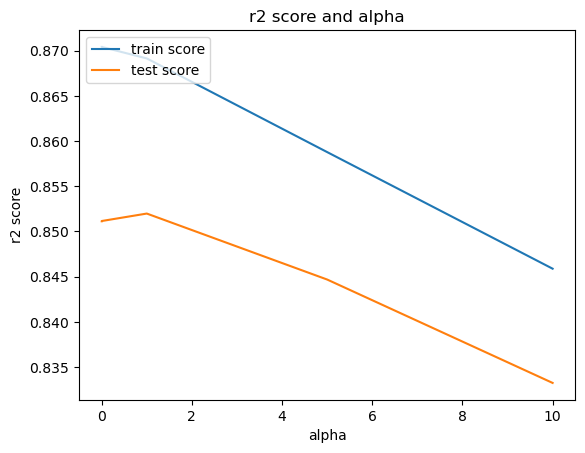

In [102]:

gscv_results['param_alpha'] = gscv_results['param_alpha'].astype('int32')
plt.plot(gscv_results['param_alpha'], gscv_results['mean_train_score'])
plt.plot(gscv_results['param_alpha'], gscv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [103]:
#  k fold for neg_mean_absolute_error score & tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
gscv_results = pd.DataFrame(model_cv.cv_results_)
gscv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005098,0.001463,0.003025,0.000903,0.001,{'alpha': 0.001},-19539.110065,-19163.073444,-20299.925573,-17104.249683,...,-19111.842852,1071.768851,4,-17773.503630,-17847.056330,-17830.298931,-18597.742706,-17833.198575,-17976.360034,311.710007
1,0.005076,0.001423,0.003817,0.000810,0.01,{'alpha': 0.01},-19529.545238,-19160.430659,-20296.308465,-17101.658017,...,-19107.803007,1071.039978,3,-17771.337002,-17845.137322,-17828.790816,-18594.582862,-17830.167185,-17974.003037,311.311598
2,0.005571,0.001205,0.003909,0.000913,1.0,{'alpha': 1.0},-18870.481756,-19007.356054,-20118.810335,-16960.910917,...,-18848.270830,1038.448929,1,-17654.452787,-17803.012161,-17733.178460,-18402.071342,-17660.690163,-17850.680983,280.967081
3,0.006181,0.000527,0.004716,0.000841,5.0,{'alpha': 5.0},-18300.404033,-19191.186007,-20416.111464,-17560.400570,...,-18936.730774,962.315167,2,-18028.851253,-18210.282135,-18014.002919,-18641.279552,-17940.805156,-18167.044203,253.168607
4,0.006077,0.000811,0.003107,0.001114,10.0,{'alpha': 10.0},-18595.749761,-19856.858390,-20683.569933,-18333.935319,...,-19345.480899,853.825261,5,-18686.479014,-18745.516064,-18491.201901,-19114.542538,-18605.455030,-18728.638909,210.966588


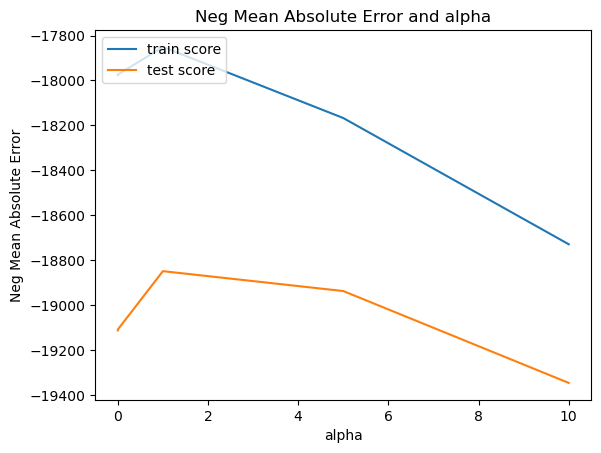

In [106]:
# plotting mean test and train scores
gscv_results['param_alpha'] = gscv_results['param_alpha'].astype('int32')
plt.plot(gscv_results['param_alpha'], gscv_results['mean_train_score'])
plt.plot(gscv_results['param_alpha'], gscv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg Mean Absolute Error')
plt.title("Neg Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [107]:
# model with optimal alpha is equal to 4
# ridge regression
lm = Ridge(alpha=4)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8623220249851813
0.8593513487787321


In [108]:
ridge.fit(X_train, y_train)
ridge.coef_

array([ 13799.65781217,  25718.82813224, 121563.88087893,  35517.52320438,
        35897.08373011,  50501.20101661,   -637.05980409,  17558.45465227,
        46966.36049308,  -7508.49376541,  67459.27589459,  31257.42176621,
       -11924.45748619,  76866.9249443 ,   9698.95702028,  -6562.33382315,
          745.14215617,    194.31982134, -74742.36643164, -53600.18485852,
        53515.61344061,  13948.85962965,  12050.54452569,  28941.54778791,
         7196.95301878,   8069.71626295,   7166.21188741,   6063.62614089,
        11310.83861061, -64612.65100749, -18689.41051247,  22389.77834205])

### This score looks good so we can conclude

## We can now do ridge regression after doing variable shrinkage by Lasso regression

In [133]:
# k fold with negative_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
gscv_results = pd.DataFrame(model_cv.cv_results_)
gscv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005465,0.001283,0.002546,0.001324,0.001,{'alpha': 0.001},-19539.110065,-19163.073444,-20299.925573,-17104.249683,...,-19111.842852,1071.768851,4,-17773.503630,-17847.056330,-17830.298931,-18597.742706,-17833.198575,-17976.360034,311.710007
1,0.004849,0.001354,0.003755,0.001403,0.01,{'alpha': 0.01},-19529.545238,-19160.430659,-20296.308465,-17101.658017,...,-19107.803007,1071.039978,3,-17771.337002,-17845.137322,-17828.790816,-18594.582862,-17830.167185,-17974.003037,311.311598
2,0.005154,0.001263,0.003207,0.001169,1.0,{'alpha': 1.0},-18870.481756,-19007.356054,-20118.810335,-16960.910917,...,-18848.270830,1038.448929,1,-17654.452787,-17803.012161,-17733.178460,-18402.071342,-17660.690163,-17850.680983,280.967081
3,0.004815,0.001868,0.002911,0.001570,5.0,{'alpha': 5.0},-18300.404033,-19191.186007,-20416.111464,-17560.400570,...,-18936.730774,962.315167,2,-18028.851253,-18210.282135,-18014.002919,-18641.279552,-17940.805156,-18167.044203,253.168607
4,0.005715,0.000624,0.002985,0.000319,10.0,{'alpha': 10.0},-18595.749761,-19856.858390,-20683.569933,-18333.935319,...,-19345.480899,853.825261,5,-18686.479014,-18745.516064,-18491.201901,-19114.542538,-18605.455030,-18728.638909,210.966588


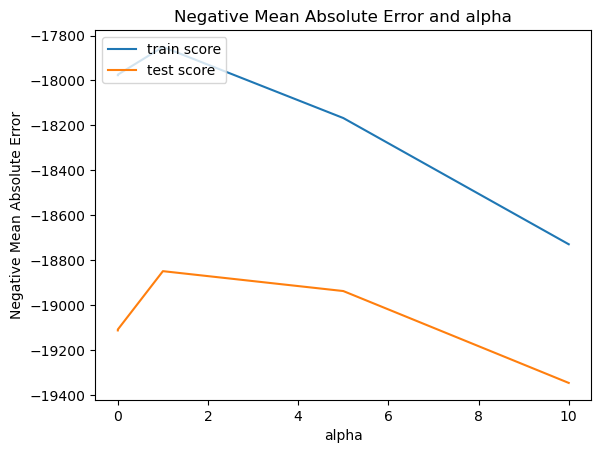

In [135]:
# plotting mean test and train scoes with alpha to tune hyper parameter
gscv_results['param_alpha'] = gscv_results['param_alpha'].astype('int32')

# plotting
plt.plot(gscv_results['param_alpha'], gscv_results['mean_train_score'])
plt.plot(gscv_results['param_alpha'], gscv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [138]:
# model with optimal alpha = 1
# lasso regression
lm = Ridge(alpha=1)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8680374507192701
0.8687301780936387


In [139]:
ridge.fit(X_train, y_train)
ridge.coef_

array([ 13799.65781217,  25718.82813224, 121563.88087893,  35517.52320438,
        35897.08373011,  50501.20101661,   -637.05980409,  17558.45465227,
        46966.36049308,  -7508.49376541,  67459.27589459,  31257.42176621,
       -11924.45748619,  76866.9249443 ,   9698.95702028,  -6562.33382315,
          745.14215617,    194.31982134, -74742.36643164, -53600.18485852,
        53515.61344061,  13948.85962965,  12050.54452569,  28941.54778791,
         7196.95301878,   8069.71626295,   7166.21188741,   6063.62614089,
        11310.83861061, -64612.65100749, -18689.41051247,  22389.77834205])

### This score looks good and is pretty close to our previous ridge regression

# Conclusion